In [39]:
from matplotlib import pyplot as plt
import numpy as np

In [249]:
N = 500
M = 500
h = 1 / max(N, M)
Grid = np.zeros((N, M))
ux1 = np.zeros(M) + 0
ux2 = np.zeros(M) + 0
uy1 = np.zeros(N) + 0
uy2 = np.zeros(N) + 0
Grid[0] = ux1
Grid[N-1] = ux2
Grid[:, 0] = uy1
Grid[:, M-1] = uy2

In [264]:
def f(x, y):
    A = (x - 0.5) ** 2 + (y - 0.5) ** 2 < 0.02**2
    return 50 *  np.array(A)

def f2(x, y):
    return (x+y)**3

In [265]:
Grid

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.39477915e-28, 1.50710382e-27, ...,
        1.84295754e-27, 9.02987878e-28, 0.00000000e+00],
       [0.00000000e+00, 1.50710382e-27, 3.07644591e-27, ...,
        3.75608594e-27, 1.84325881e-27, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.84295754e-27, 3.75608594e-27, ...,
        4.59308420e-27, 2.25047143e-27, 0.00000000e+00],
       [0.00000000e+00, 9.02987878e-28, 1.84325881e-27, ...,
        2.25047143e-27, 1.10439087e-27, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

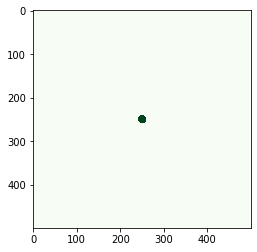

In [266]:
eps = 1e-6
r = 1e10
X, Y = np.meshgrid(np.linspace(0, 1, M, endpoint=False), np.linspace(0, 1, N, endpoint=False))
plt.imshow((f(X, Y)), cmap='Greens')

In [267]:
while r > eps:
    r = np.max(np.abs(Grid[1:N-1, 1:M-1] - (Grid[2:N, 1:M-1] + Grid[0:N-2, 1:M-1] + Grid[1:N-1, 2:M] + Grid[1:N-1, 0:M-2])/4 - f(X[1:N-1, 1:M-1], Y[1:N-1, 1:M-1])*h**2 / 4 ))
    Grid[1:N-1, 1:M-1] = (Grid[2:N, 1:M-1] + Grid[0:N-2, 1:M-1] + Grid[1:N-1, 2:M] + Grid[1:N-1, 0:M-2])/4 + f(X[1:N-1, 1:M-1], Y[1:N-1, 1:M-1])*h**2 / 4

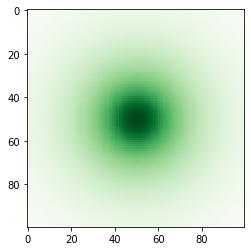

In [268]:
plt.imshow(Grid[200:300, 200:300], cmap='Greens')